In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")


from sklearn import set_config
set_config(print_changed_only=False)


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
master=pd.read_csv('cs-training.csv')
data=master.copy()

# Data Description

Variable Name Description Type

- SeriousDlqin2yrs Person experienced 90 days past due delinquency or worse Y/N

- RevolvingUtilizationOfUnsecuredLines Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage

- age Age of borrower in years integer

- NumberOfTime3059DaysPastDueNotWorse Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer

- DebtRatio Monthly debt payments, alimony,living costs divided by monthy gross income percentage

- MonthlyIncome Monthly income real

- NumberOfOpenCreditLinesAndLoans Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer

- NumberOfTimes90DaysLate Number of times borrower has been 90 days or more past due. integer

- NumberRealEstateLoansOrLines Number of mortgage and real estate loans including home equity lines of credit integer

- NumberOfTime60-89DaysPastDueNotWorse Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer

- NumberOfDependents Number of dependents in family excluding themselves (spouse, children etc.) integer

In [4]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [6]:
print(data['SeriousDlqin2yrs'].value_counts()/data.shape[0] *100)

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64


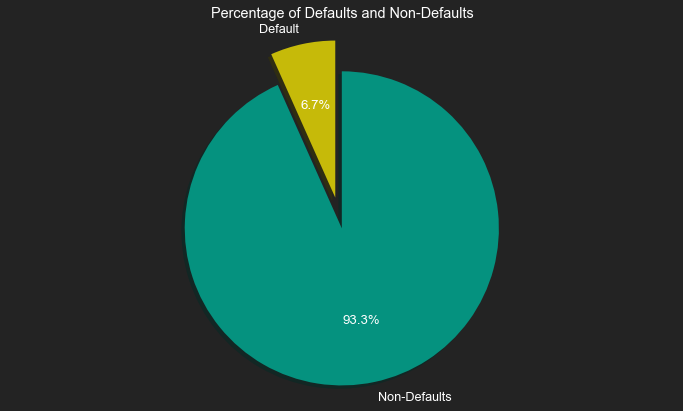

In [7]:
# TARGET

plt.rcParams['text.color'] = 'white'
labels = 'Default', 'Non-Defaults'
sizes = [6.684, 93.316]
explode = (0.2, 0)
cols    = ['#C6BA09', '#05927F']

fig = plt.figure(figsize = (12,7))
plt.pie(sizes, explode=explode, colors = cols, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt. title("Percentage of Defaults and Non-Defaults")
plt.show()

**The Target mostly in Non-Default with ratio 93:7. Imbalance dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [9]:
import missingno as msno

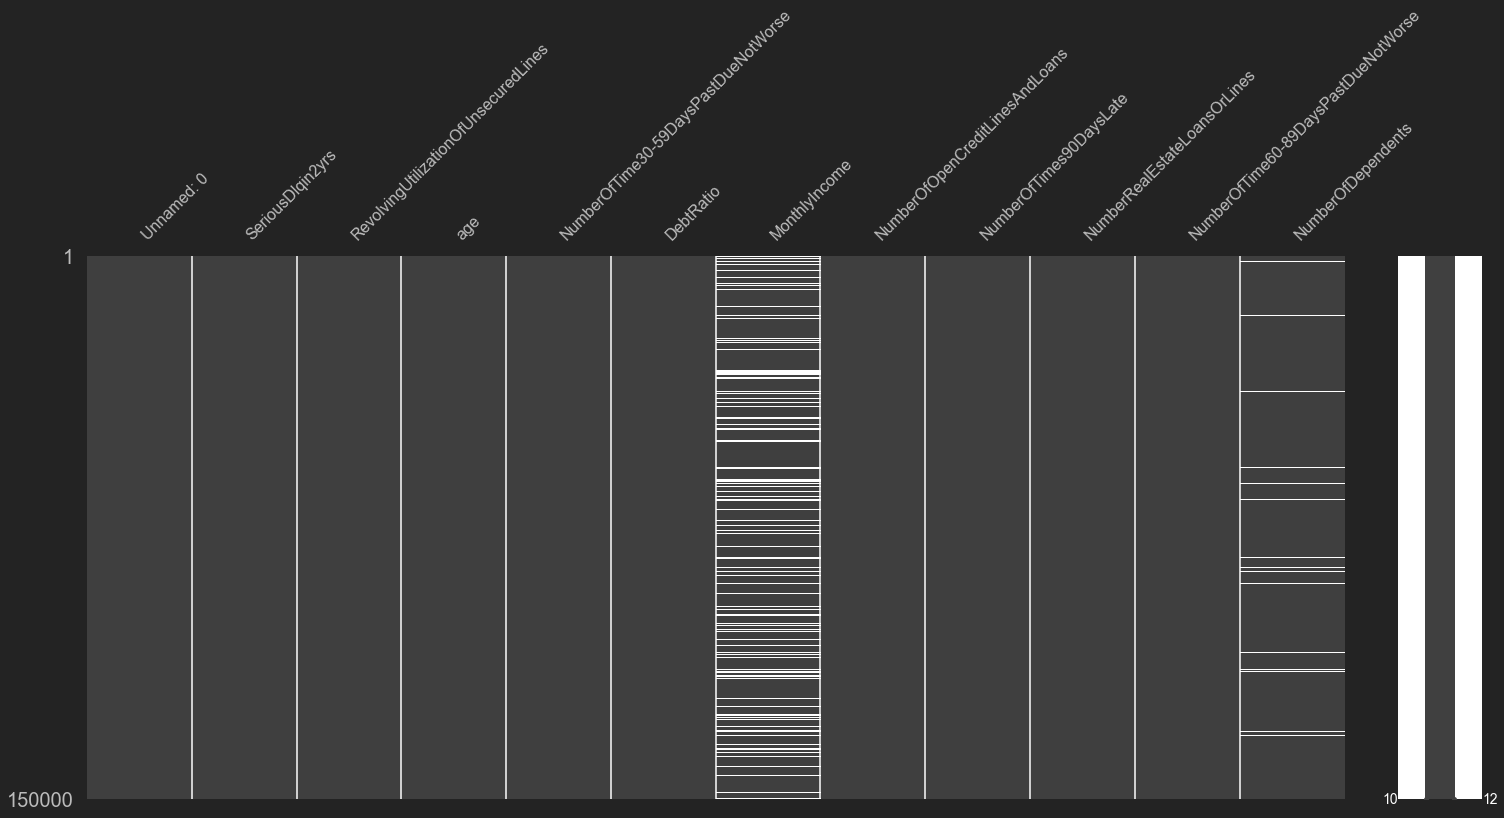

In [10]:
msno.matrix(data)

In [11]:
credit =[]

for i in data.columns: #mengiterasi i di setiap kolom pada data
    credit.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list credit_describe
        i,
        data[i].dtypes,#tipe
        data[i].isna().sum(),#jumlah NaN
        round((((data[i].isna().sum())/(len(data)))*100),2),#Persentase jumlah NaN
        data[i].nunique(),#Jumlah Unique
        data[i].unique() #Unique
    ])

In [12]:
creditdesc = pd.DataFrame(credit, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data credit_describe dengan kolom-kolom tersebut
creditdesc

,column,type,nan,nan%,nunique,unique
0,Unnamed: 0,int64,0,0.00,150000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,SeriousDlqin2yrs,int64,0,0.00,2,"[1, 0]"
2,RevolvingUtilizationOfUnsecuredLines,float64,0,0.00,125728,"[0.7661266090000001, 0.9571510190000001, 0.658..."
3,age,int64,0,0.00,86,"[45, 40, 38, 30, 49, 74, 57, 39, 27, 51, 46, 7..."
4,NumberOfTime30-59DaysPastDueNotWorse,int64,0,0.00,16,"[2, 0, 1, 3, 4, 5, 7, 10, 6, 98, 12, 8, 9, 96,..."
5,DebtRatio,float64,0,0.00,114194,"[0.8029821290000001, 0.12187620099999999, 0.08..."
6,MonthlyIncome,float64,29731,19.82,13594,"[9120.0, 2600.0, 3042.0, 3300.0, 63588.0, 3500..."
7,NumberOfOpenCreditLinesAndLoans,int64,0,0.00,58,"[13, 4, 2, 5, 7, 3, 8, 9, 6, 10, 14, 22, 17, 1..."
8,NumberOfTimes90DaysLate,int64,0,0.00,19,"[0, 1, 3, 2, 5, 4, 98, 10, 9, 6, 7, 8, 15, 96,..."
9,NumberRealEstateLoansOrLines,int64,0,0.00,28,"[6, 0, 1, 3, 4, 2, 5, 8, 7, 9, 17, 15, 10, 12,..."


**2 columns have missing values ('Monthly income, Number of dependents')**

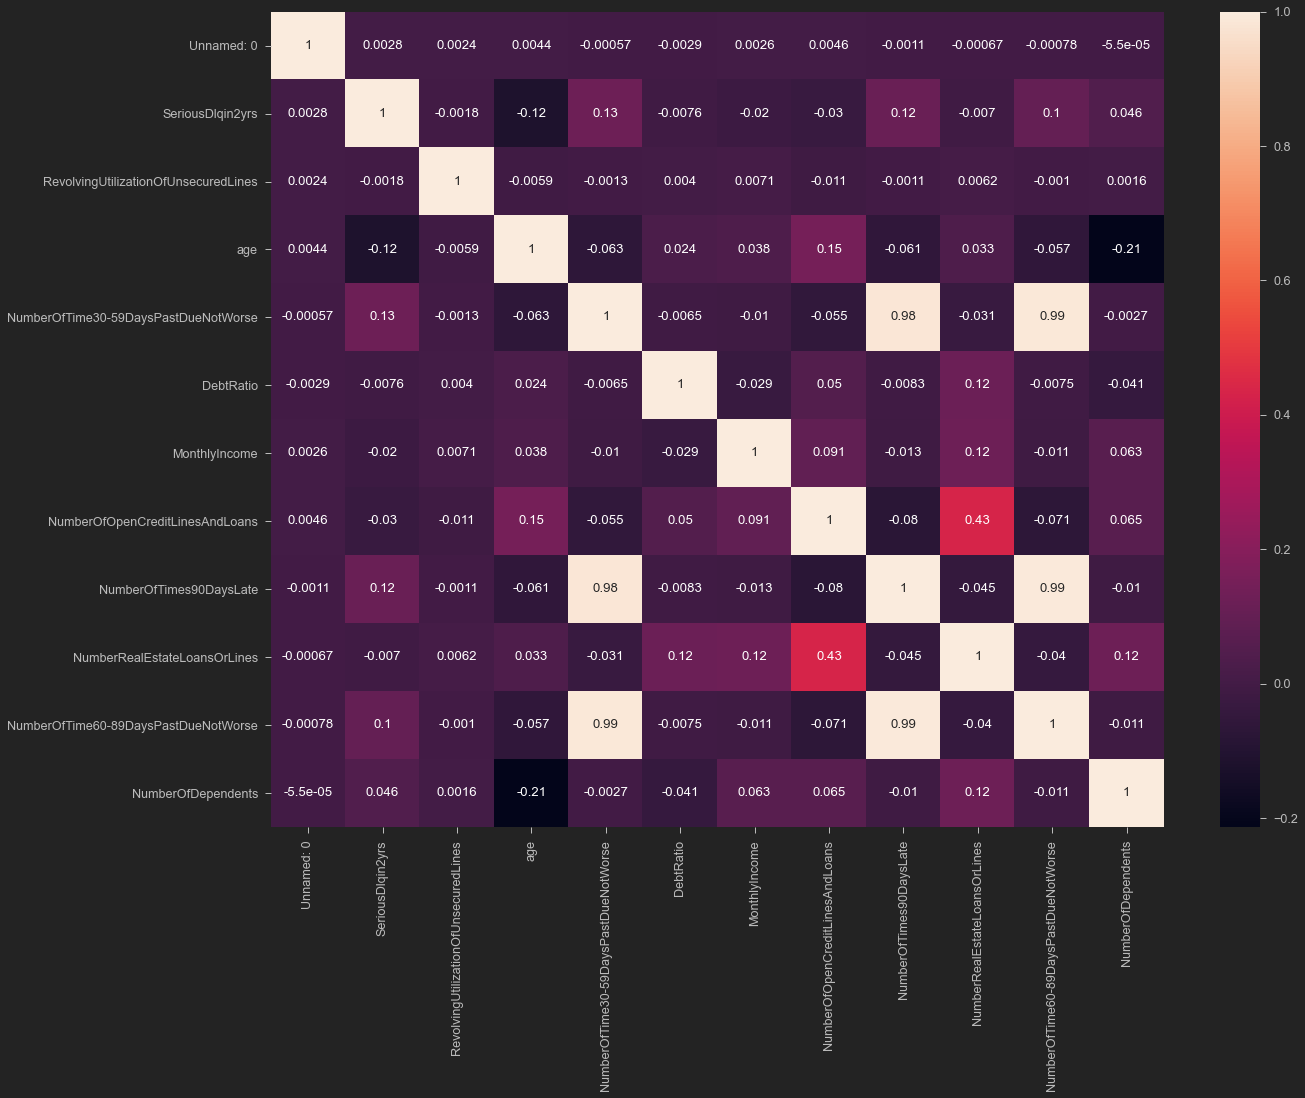

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

We can see that correlation between NumberOfTIme30-59DaysPastDueNotWorse, 60-89, 90 is strong.


In [14]:
num_top10_corr = data.corr()['SeriousDlqin2yrs'].sort_values(ascending=False).head(30).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,SeriousDlqin2yrs
SeriousDlqin2yrs,1.000000
NumberOfTime30-59DaysPastDueNotWorse,0.125587
NumberOfTimes90DaysLate,0.117175
NumberOfTime60-89DaysPastDueNotWorse,0.102261
NumberOfDependents,0.046048
Unnamed: 0,0.002801
RevolvingUtilizationOfUnsecuredLines,-0.001802
NumberRealEstateLoansOrLines,-0.007038
DebtRatio,-0.007602
MonthlyIncome,-0.019746


In [15]:
data.drop('Unnamed: 0',axis=1, inplace= True)

# Data Features Observation

## Default and Non-Default

In [16]:
default=data.copy()

In [17]:
default[default['SeriousDlqin2yrs']==1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10026.0,10026.000000,10026.000000,10026.00000,10026.000000,8357.000000,10026.000000,10026.000000,10026.000000,10026.000000,9847.000000
mean,1.0,4.367282,45.926591,2.38849,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208
std,0.0,131.835778,12.916289,11.73451,1238.360283,6171.719674,5.653601,11.762760,1.425723,11.753068,1.219367
min,1.0,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.398219,36.000000,0.00000,0.193979,2963.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.838853,45.000000,0.00000,0.428227,4500.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,1.000000,54.000000,2.00000,0.892371,6800.000000,11.000000,1.000000,2.000000,1.000000,2.000000
max,1.0,8328.000000,101.000000,98.00000,38793.000000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000


In [18]:
default[default['SeriousDlqin2yrs']==0].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,139974.0,139974.000000,139974.000000,139974.000000,139974.000000,1.119120e+05,139974.000000,139974.000000,139974.000000,139974.000000,136229.000000
mean,0.0,6.168855,52.751375,0.280109,357.151168,6.747838e+03,8.493620,0.135225,1.020368,0.126666,0.743417
std,0.0,256.126350,14.791079,2.946075,2083.282060,1.481350e+04,5.105229,2.909088,1.105512,2.900930,1.105895
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.026983,42.000000,0.000000,0.173707,3.461000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.133288,52.000000,0.000000,0.362659,5.466000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.0,0.487686,63.000000,0.000000,0.865608,8.333000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,0.0,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Default have some characteristics:

1. Have bigger RevolvingUtilizationOfUnsecuredLines value
2. Younger Age
3. Lower Debt ratio
4. Less monthly income
5. Less Number of open credit lines and loans
6. Slightly bigger number of dependents value

for the number of late it's a bit hard to interprete since the data has many 96 and 98 value so it'll ruin the description. 
on the other hand, both of default and not case just have slightly difference in Number Real Estate Loans Or lines

### Upnormal values

In [19]:
data.quantile(0.95)

SeriousDlqin2yrs                            1.0
RevolvingUtilizationOfUnsecuredLines        1.0
age                                        78.0
NumberOfTime30-59DaysPastDueNotWorse        2.0
DebtRatio                                2449.0
MonthlyIncome                           14587.6
NumberOfOpenCreditLinesAndLoans            18.0
NumberOfTimes90DaysLate                     1.0
NumberRealEstateLoansOrLines                3.0
NumberOfTime60-89DaysPastDueNotWorse        1.0
NumberOfDependents                          3.0
Name: 0.95, dtype: float64

In [20]:
data[data['RevolvingUtilizationOfUnsecuredLines']<=1]['SeriousDlqin2yrs'].describe()

count    146679.000000
mean          0.059920
std           0.237339
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [21]:
data=data[(data['RevolvingUtilizationOfUnsecuredLines']<=10)]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149759 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149759 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149759 non-null  float64
 2   age                                   149759 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149759 non-null  int64  
 4   DebtRatio                             149759 non-null  float64
 5   MonthlyIncome                         120096 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149759 non-null  int64  
 7   NumberOfTimes90DaysLate               149759 non-null  int64  
 8   NumberRealEstateLoansOrLines          149759 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149759 non-null  int64  
 10  NumberOfDependents                    145848 non-null  float64
dtype

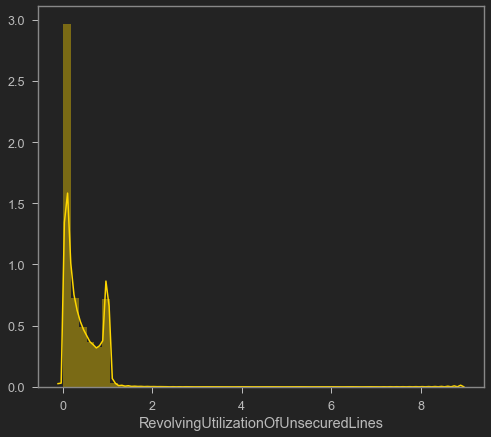

In [23]:
sns.distplot(data['RevolvingUtilizationOfUnsecuredLines'],color='gold')

In [24]:
IQR=data['RevolvingUtilizationOfUnsecuredLines'].describe().loc['75%']-data['RevolvingUtilizationOfUnsecuredLines'].describe().loc['25%']
upper=data['RevolvingUtilizationOfUnsecuredLines'].describe().loc['75%']+1.5*IQR

In [25]:
interpretation=data[data['RevolvingUtilizationOfUnsecuredLines']<upper]

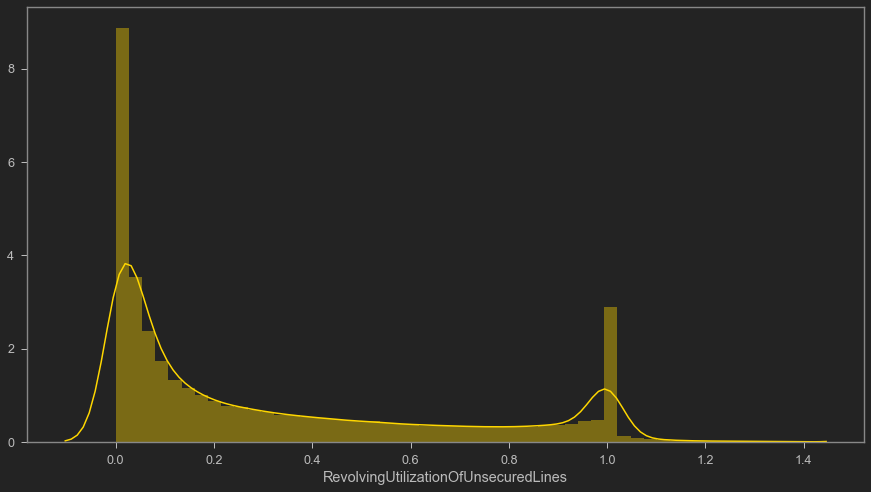

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation['RevolvingUtilizationOfUnsecuredLines'],color='gold')

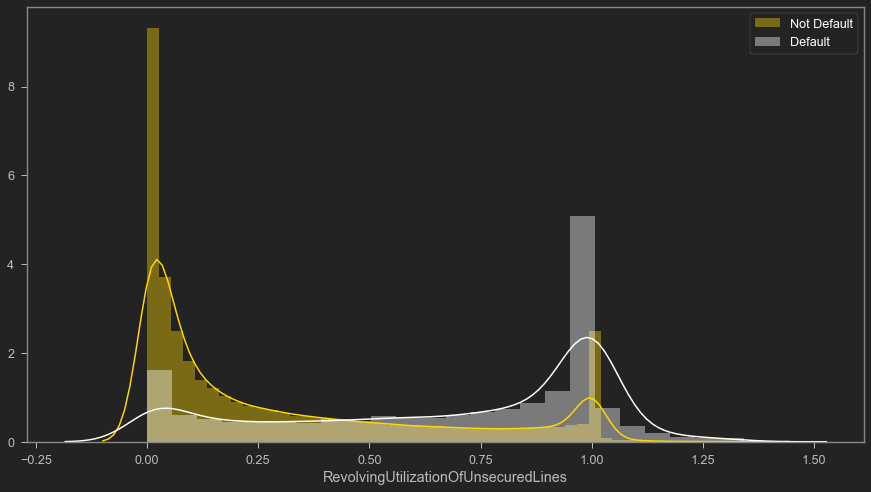

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['RevolvingUtilizationOfUnsecuredLines'], label=['Not Default'],color='gold')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['RevolvingUtilizationOfUnsecuredLines'], label=['Default'],color='w')
plt.legend()

Bimodal Distribution. 
Most people have used 5% from their total credit card's limit while the other has used almost all of the limit.
Moreover, the bimodal distribution represents the separation between defaulting and not, with bigger RUUL increase the tendency of people to be defaulting.

## Debt Ratio

### Upnormal Values

In [28]:
data['DebtRatio'].describe()

count    149759.000000
mean        352.652789
std        2038.203228
min           0.000000
25%           0.174960
50%           0.366483
75%           0.866946
max      329664.000000
Name: DebtRatio, dtype: float64

In [29]:
data.quantile(0.95)

SeriousDlqin2yrs                            1.0
RevolvingUtilizationOfUnsecuredLines        1.0
age                                        78.0
NumberOfTime30-59DaysPastDueNotWorse        2.0
DebtRatio                                2447.1
MonthlyIncome                           14583.0
NumberOfOpenCreditLinesAndLoans            18.0
NumberOfTimes90DaysLate                     1.0
NumberRealEstateLoansOrLines                3.0
NumberOfTime60-89DaysPastDueNotWorse        1.0
NumberOfDependents                          3.0
Name: 0.95, dtype: float64

In [30]:
data[data['DebtRatio']>1]['age'].count()

35060

we have 35000 data with debt ratio > 1, which means they debt more than they earn. A more interesting fact that more than 5% of the data have a debt ratio of more than 2447.1. let's check deeper

In [31]:
data[data['DebtRatio']>2447.1]['SeriousDlqin2yrs'].value_counts()

0    7074
1     414
Name: SeriousDlqin2yrs, dtype: int64

In [32]:
data[data['DebtRatio']>2447.1]['MonthlyIncome'].value_counts()

0.0    347
1.0     32
Name: MonthlyIncome, dtype: int64

In [33]:
data[data['DebtRatio']>2447.1]['MonthlyIncome'].isna().sum()

7109

from 5% of our data, which has more than 2447.1 debtratio, all of the data is filled either with 0,1 or nan value. I'll assume it as entry error

In [34]:
data=data[data['DebtRatio']<=2447.1]

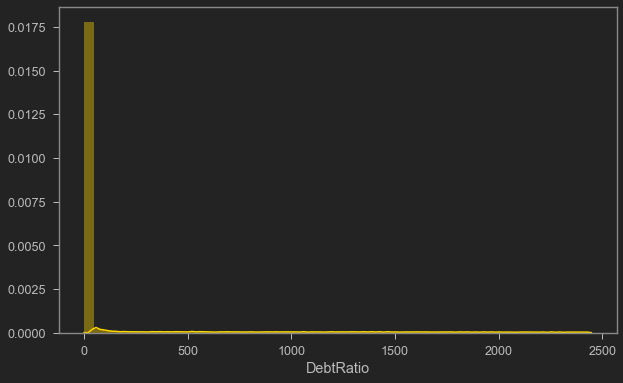

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(data['DebtRatio'],color='gold')

In [36]:
IQR=(data['DebtRatio'].describe().loc['75%'])-(data['DebtRatio'].describe().loc['25%'])
upper=data['DebtRatio'].describe().loc['75%']+1.5*IQR

In [37]:
interpretation=interpretation[interpretation['DebtRatio']<upper]

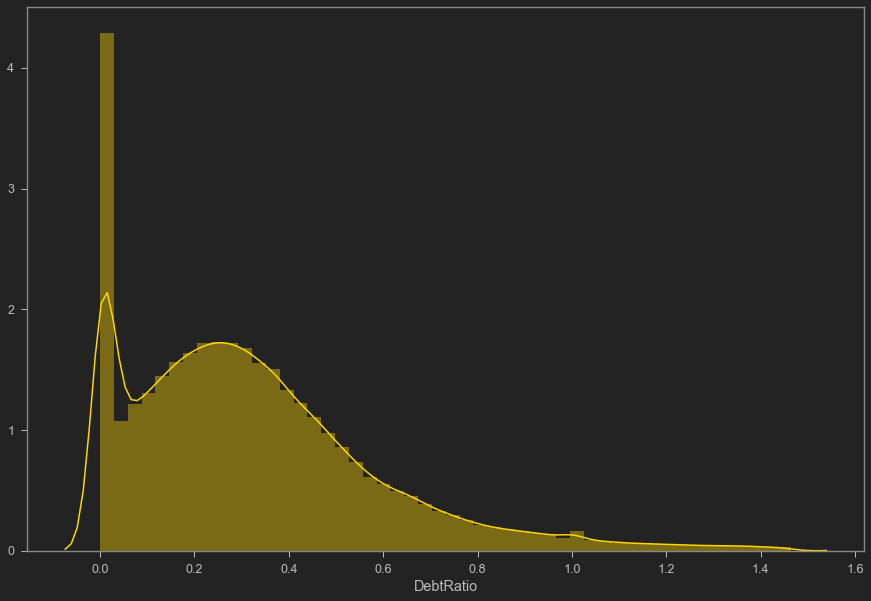

In [38]:
plt.figure(figsize=(15,10))
sns.distplot(interpretation['DebtRatio'],color='gold')

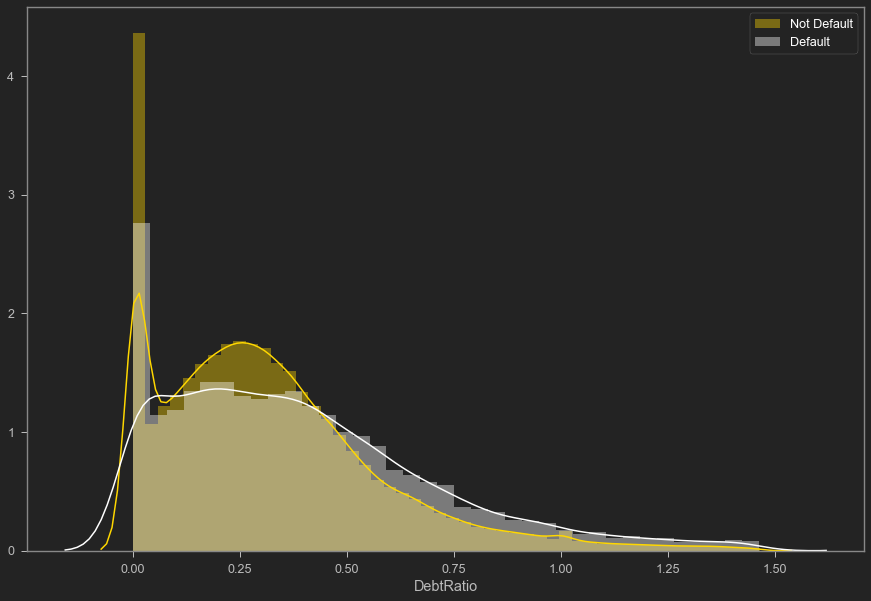

In [39]:
plt.figure(figsize=(15,10))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['DebtRatio'], label=['Not Default'],color='gold')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['DebtRatio'], label=['Default'],color='white')
plt.legend()

There is no significant distinction between default or not in debt ratio feature

## Number of late

### Upnormal Value

In [40]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     119576
1      15204
2       4339
3       1651
4        692
5        315
98       264
6        131
7         52
8         24
9         11
96         5
10         3
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

Seeing the data has so many 98 and 96 value while the 14-95 empty is interesting

In [41]:
data[data['NumberOfTime30-59DaysPastDueNotWorse']>95][['SeriousDlqin2yrs','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']].head()

,SeriousDlqin2yrs,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
1733,1,98,98,98
2286,0,98,98,98
3884,0,98,98,98
4417,0,98,98,98
4705,0,98,98,98


In [42]:
data[data['NumberOfTime30-59DaysPastDueNotWorse']>95][['SeriousDlqin2yrs','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']].describe()

,SeriousDlqin2yrs,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


based of the table above, all of NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, and NumberOfTime60-89DaysPastDueNotWorse have same value when the value is above 95. Furthermore, from the SeriousDlqin2yrs describe, these data have 0.54 mean, which is interpreting that these data have almost balanced between default and not so I will keep the data. In my opinion, these 96 or 98 value is a kind of label or something like that.

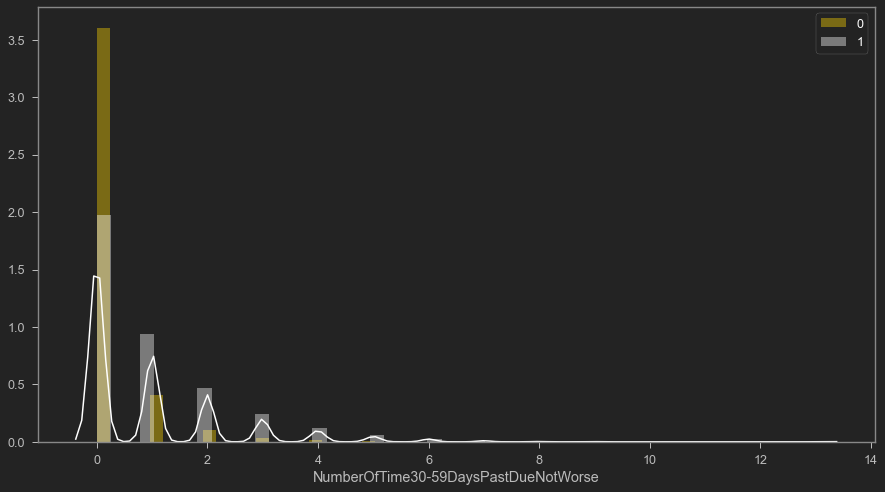

In [43]:
plt.figure(figsize=(15,8))
sns.distplot(data[(data['NumberOfTime30-59DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==0)]['NumberOfTime30-59DaysPastDueNotWorse'], label='0',color='gold')
sns.distplot(data[(data['NumberOfTime30-59DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==1)]['NumberOfTime30-59DaysPastDueNotWorse'], label='1',color='w')
plt.legend()

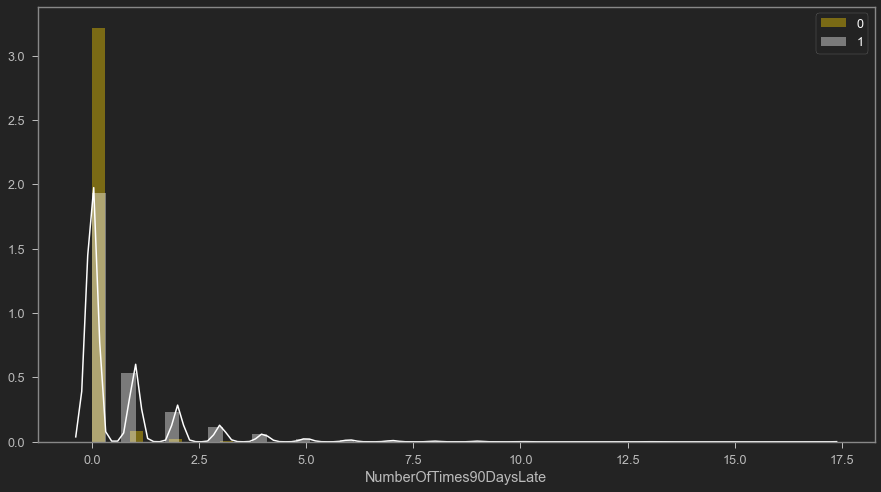

In [44]:
plt.figure(figsize=(15,8))
sns.distplot(data[(data['NumberOfTimes90DaysLate']<90) & (data['SeriousDlqin2yrs']==0)]['NumberOfTimes90DaysLate'], label='0',color='gold')
sns.distplot(data[(data['NumberOfTimes90DaysLate']<90) & (data['SeriousDlqin2yrs']==1)]['NumberOfTimes90DaysLate'], label='1',color='w')
plt.legend()

In [45]:
data['NumberOfTimes90DaysLate'].describe()

count    142271.000000
mean          0.277231
std           4.279764
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

because the 25% and 75% value are 0, so if I remove the outlier, it would be only leaving the 0 value

to mix these 3 columns, I'll make a new feature which worth the sum from those columns

In [46]:
mix=data.copy()

In [47]:
mix['total']=mix['NumberOfTimes90DaysLate']+mix['NumberOfTime60-89DaysPastDueNotWorse']+mix['NumberOfTime30-59DaysPastDueNotWorse']

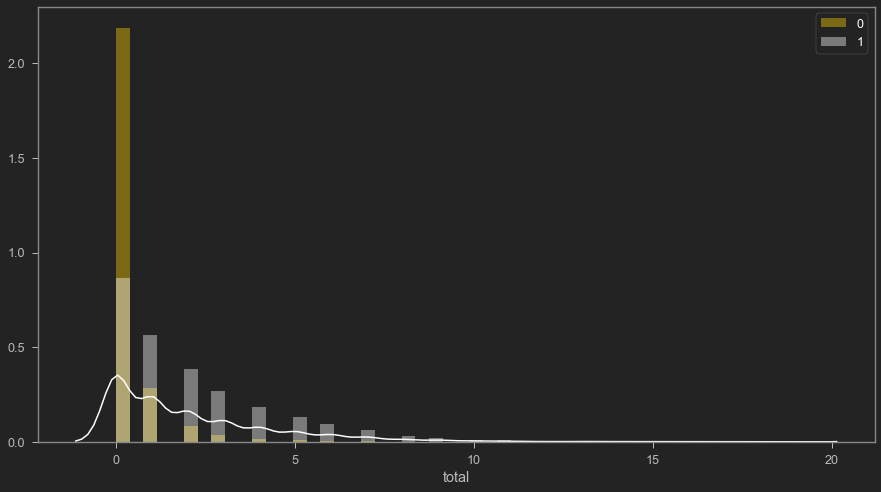

In [48]:
plt.figure(figsize=(15,8))
sns.distplot(mix[(mix['SeriousDlqin2yrs']==0)&(mix['total']<100)]['total'],label=0,color='gold')
sns.distplot(mix[(mix['SeriousDlqin2yrs']==1)&(mix['total']<100)]['total'],label=1,color='w')
plt.legend()

## MonthlyIncome

In [49]:
data['MonthlyIncome'].describe()

count    1.197170e+05
mean     6.688740e+03
std      1.441059e+04
min      0.000000e+00
25%      3.407000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

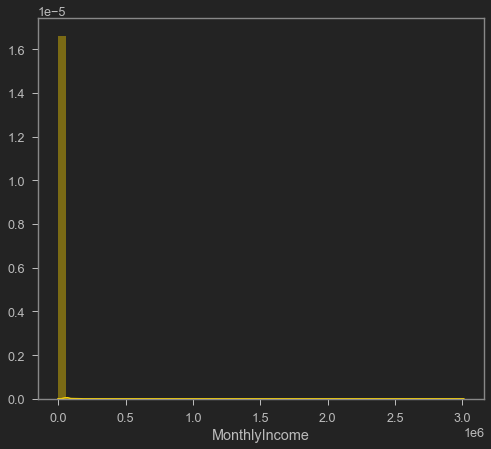

In [50]:
sns.distplot(data['MonthlyIncome'].dropna(),color='gold')

the data has many people with 0 income and a big outlier, up to 3000000. It's become hard to analyzed. I'll drop the 0 value and outlier

In [51]:
interpretation['MonthlyIncome'].fillna(interpretation['MonthlyIncome'].median(),inplace=True)

In [52]:
IQR=(data['MonthlyIncome'].describe().loc['75%'])-(data['MonthlyIncome'].describe().loc['25%'])
upper=data['MonthlyIncome'].describe().loc['75%']+1.5*IQR

In [53]:
interpretation=interpretation[(interpretation['MonthlyIncome']>0)&(interpretation['MonthlyIncome']<upper)]

In [54]:
interpretation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112303 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      112303 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  112303 non-null  float64
 2   age                                   112303 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  112303 non-null  int64  
 4   DebtRatio                             112303 non-null  float64
 5   MonthlyIncome                         112303 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       112303 non-null  int64  
 7   NumberOfTimes90DaysLate               112303 non-null  int64  
 8   NumberRealEstateLoansOrLines          112303 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  112303 non-null  int64  
 10  NumberOfDependents                    111827 non-null  float64
dtype

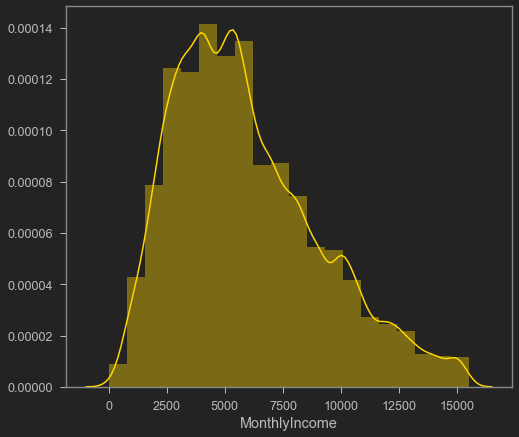

In [55]:
sns.distplot(interpretation['MonthlyIncome'],color='gold',bins=20)

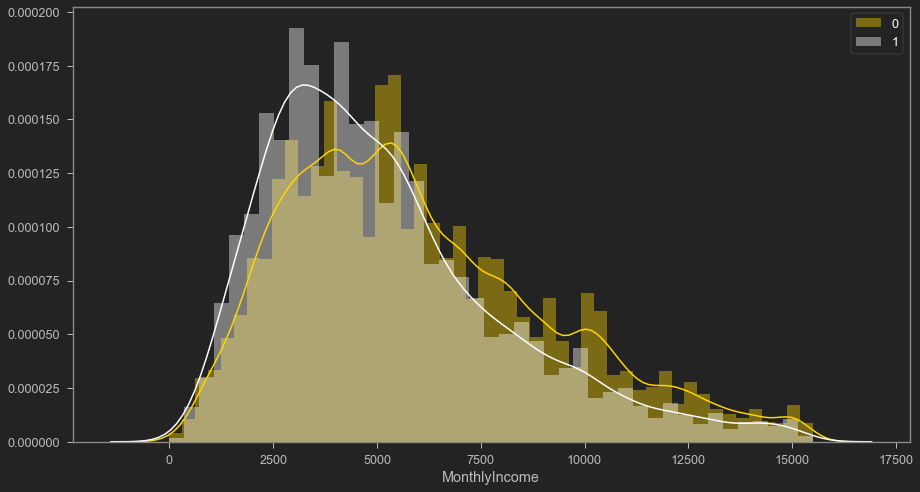

In [56]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['MonthlyIncome'], label='0',color='gold')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['MonthlyIncome'], label='1',color='w')
plt.legend()

Monthly Income also doesn't give any significant distinction between default and not

## NumberOfOpenCreditLinesAndLoans

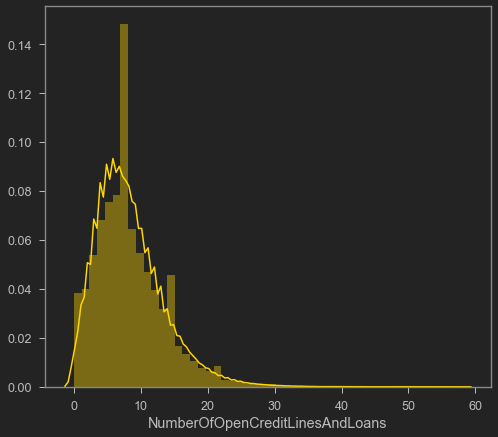

In [57]:
sns.distplot(data['NumberOfOpenCreditLinesAndLoans'],color='gold')

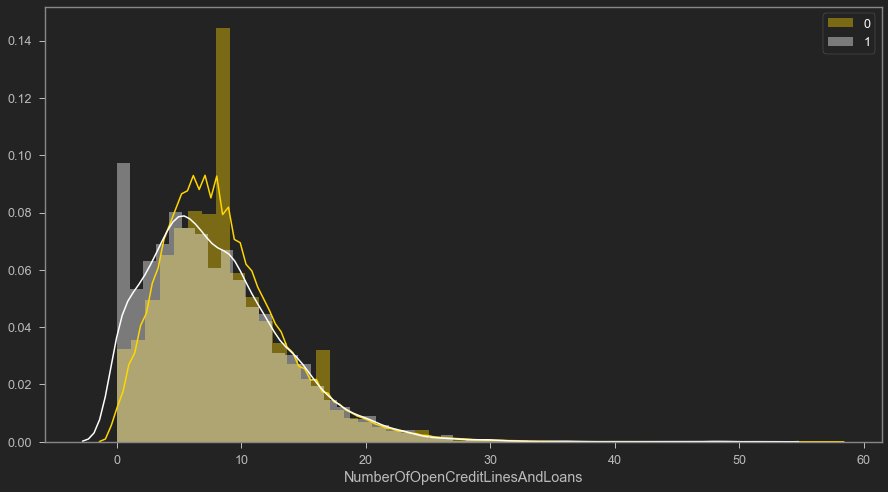

In [58]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['NumberOfOpenCreditLinesAndLoans'], label='0',color='gold')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['NumberOfOpenCreditLinesAndLoans'], label='1',color='w')
plt.legend()

## NumberRealEstateLoansOrLines

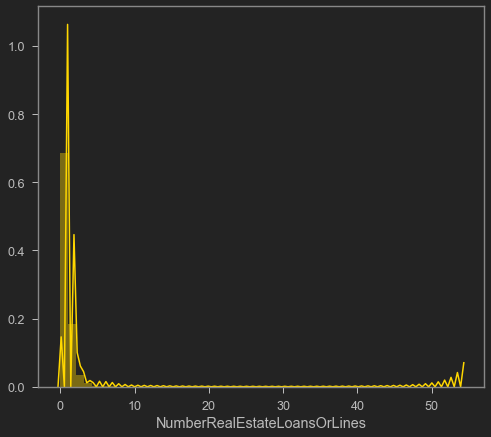

In [59]:
sns.distplot(data['NumberRealEstateLoansOrLines'],color='gold')

In [60]:
IQR=data['NumberRealEstateLoansOrLines'].describe().loc['75%']-data['NumberRealEstateLoansOrLines'].describe().loc['25%']
upper=data['NumberRealEstateLoansOrLines'].describe().loc['75%']+1.5*IQR
interpretation=interpretation[interpretation['NumberRealEstateLoansOrLines']<upper]

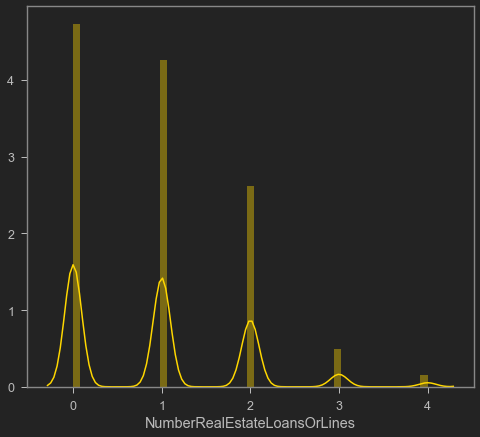

In [61]:
sns.distplot(interpretation['NumberRealEstateLoansOrLines'],color='gold')

## Number of dependents

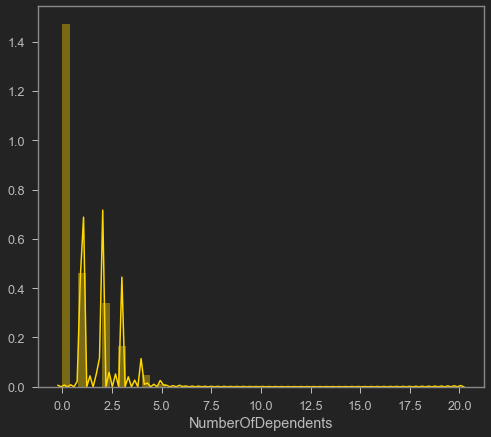

In [62]:
sns.distplot(data['NumberOfDependents'].dropna(),color='gold')

In [63]:
IQR=data['NumberOfDependents'].describe().loc['75%']-data['NumberOfDependents'].describe().loc['25%']
upper=data['NumberOfDependents'].describe().loc['75%']+1.5*IQR
interpretation=interpretation[interpretation['NumberOfDependents']<upper]

In [64]:
interpretation.fillna(interpretation['NumberOfDependents'].mode(),inplace=True)

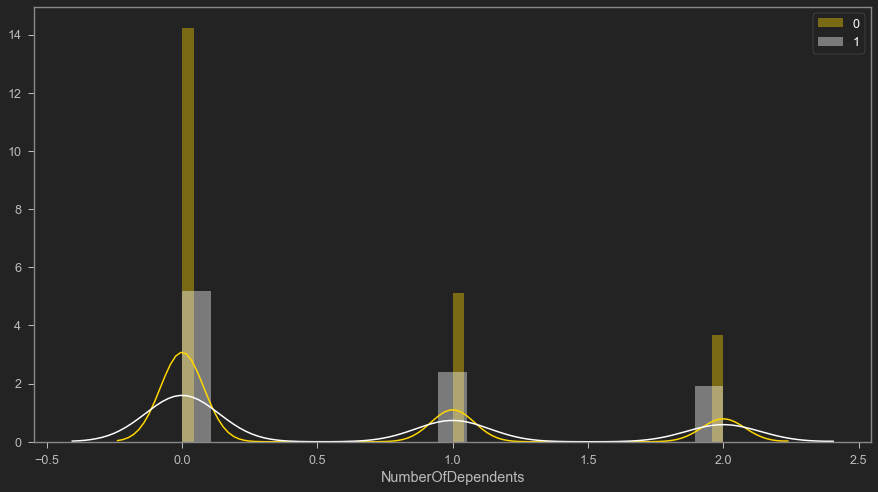

In [65]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['NumberOfDependents'],label='0',color='gold')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['NumberOfDependents'],label='1',color='w')
plt.legend()

## Age

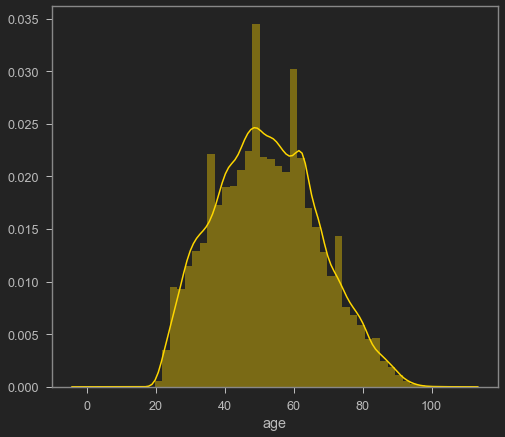

In [66]:
sns.distplot(data['age'],color='gold')

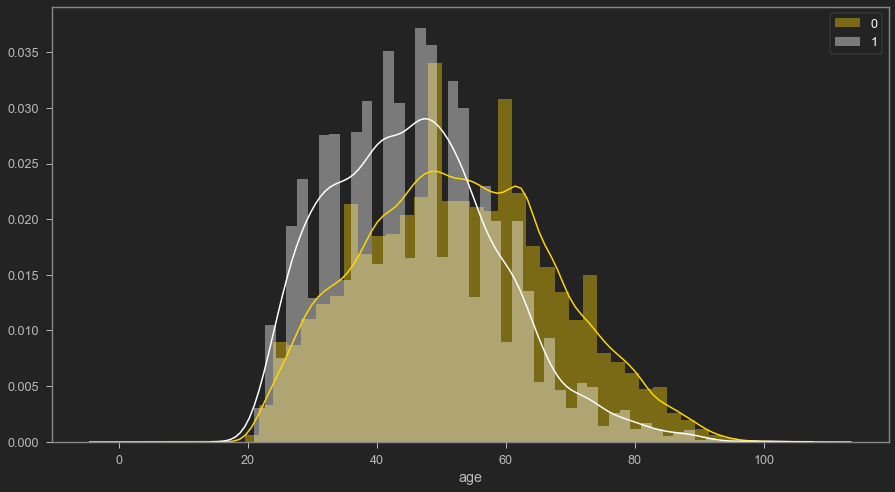

In [67]:
plt.figure(figsize=(15,8))
sns.distplot(data[data['SeriousDlqin2yrs']==0]['age'],label=0,color='gold')
sns.distplot(data[data['SeriousDlqin2yrs']==1]['age'],label=1,color='w')
plt.legend()

based on the graph before, people with a younger age have a tendency to default higher than people with older age. I'll just wonder what is the difference between old people and young people

In [68]:
df_age=data.copy()

In [69]:
df_age['class_age']=df_age['age'].apply(lambda x: '0-10' if x>=0 and x<=10 else
                                                   '11-20' if x>=11 and x<=20 else
                                                   '21-30' if x>=21 and x<=30 else
                                                   '31-40' if x>=31 and x<=40 else
                                                   '41-50' if x>=41 and x<=50 else
                                                   '51-60' if x>=51 and x<=60 else
                                                   '61-70' if x>=61 and x<=70 else
                                                   '71-80' if x>=71 and x<=80 else
                                                   '>80')

Text(0.5, 1.0, 'Distribution of class_age')

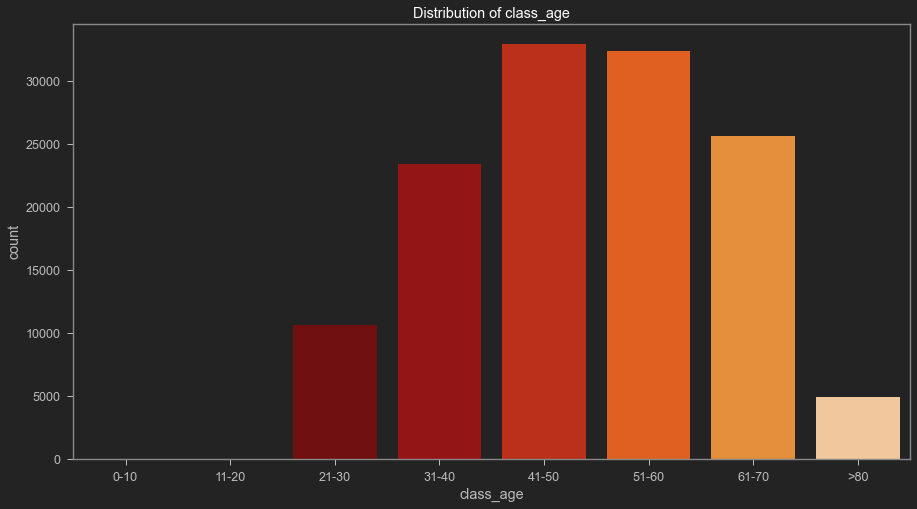

In [70]:
plt.figure(figsize=(15,8))
sns.countplot(df_age['class_age'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','>80'],palette='gist_heat')
plt.title('Distribution of class_age')
        

Text(0.5, 1.0, 'tendency to become default')

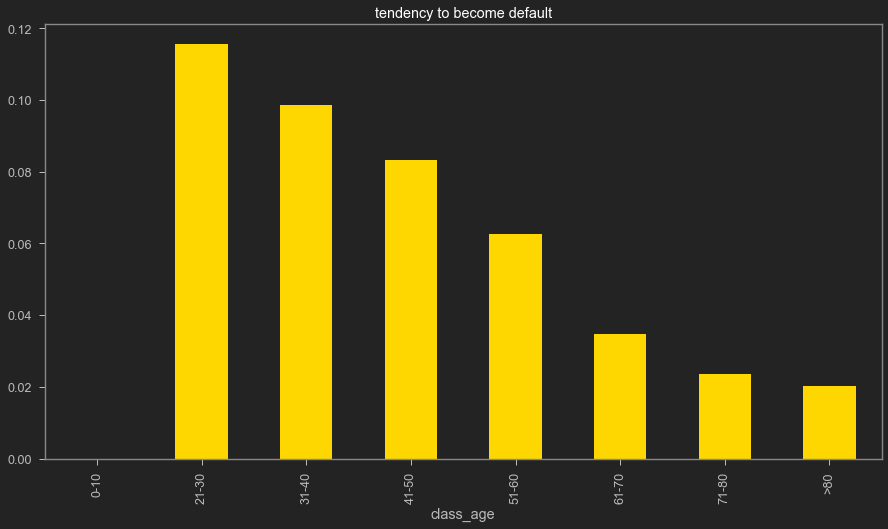

In [71]:
plt.figure(figsize=(15,8))
(df_age.groupby('class_age').mean()['SeriousDlqin2yrs']).plot(kind='bar',color='gold')
plt.title('tendency to become default')


1. Younger people have tendency to have bigger RUUL, which means they use more than half of their credit card's limit
2. Older people have more rate in debt ratio rather than younger people. They have more expenses to be paid each month 
3. older people have more monthly income. no wonder
4. Older people have more number of open credit lines and loans
5. older people have slightly bigger value in NumberRealEstateLoansorLines 
6. older people have a fewer number of dependents.
7. overall, younger people have more number of late rather than older people

by number, older people have bigger expenses each month for property, but they have better management in order to adjust their expenses each month and pay the debt on time. While on the other hand, people with younger age have less expense but have more number of late payment, although they have more dependents

# Handling Missing Values

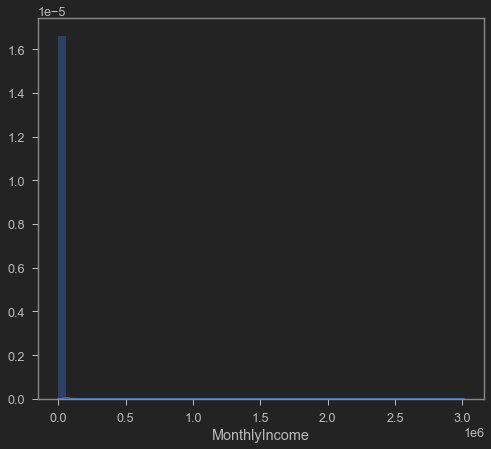

In [72]:
sns.distplot(data['MonthlyIncome'].dropna())

## Monthly Income

In [73]:
data['MonthlyIncome']=data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

## Number of Dependents

In [74]:
data['NumberOfDependents'].value_counts()

0.0     81655
1.0     25560
2.0     18822
3.0      9104
4.0      2761
5.0       723
6.0       155
7.0        50
8.0        24
9.0         4
10.0        4
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [75]:
data['NumberOfDependents']=data['NumberOfDependents'].fillna(0)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142271 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      142271 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  142271 non-null  float64
 2   age                                   142271 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  142271 non-null  int64  
 4   DebtRatio                             142271 non-null  float64
 5   MonthlyIncome                         142271 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       142271 non-null  int64  
 7   NumberOfTimes90DaysLate               142271 non-null  int64  
 8   NumberRealEstateLoansOrLines          142271 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  142271 non-null  int64  
 10  NumberOfDependents                    142271 non-null  float64
dtype

# Data Preprocessing

## Data- 1 : Original data

In [77]:
data1 = data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142271 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      142271 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  142271 non-null  float64
 2   age                                   142271 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  142271 non-null  int64  
 4   DebtRatio                             142271 non-null  float64
 5   MonthlyIncome                         142271 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       142271 non-null  int64  
 7   NumberOfTimes90DaysLate               142271 non-null  int64  
 8   NumberRealEstateLoansOrLines          142271 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  142271 non-null  int64  
 10  NumberOfDependents                    142271 non-null  float64
dtype

## Data- 2 : With Outliers

In [78]:
data2 = master.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            120269 non-null  int64  
 1   SeriousDlqin2yrs                      120269 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 3   age                                   120269 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 5   DebtRatio                             120269 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 8   NumberOfTimes90DaysLate               120269 non-null  int64  
 9   NumberRealEstateLoansOrLines          120269 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 11  

## Data- 3 : Remove 96 and 98

In [79]:
data3=data[data['NumberOfTime60-89DaysPastDueNotWorse']<95]
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142002 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      142002 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  142002 non-null  float64
 2   age                                   142002 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  142002 non-null  int64  
 4   DebtRatio                             142002 non-null  float64
 5   MonthlyIncome                         142002 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       142002 non-null  int64  
 7   NumberOfTimes90DaysLate               142002 non-null  int64  
 8   NumberRealEstateLoansOrLines          142002 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  142002 non-null  int64  
 10  NumberOfDependents                    142002 non-null  float64
dtype

## Data- 4 : Remove outlier from data 3

In [80]:
IQR=data3.describe()['DebtRatio'].loc['75%']-data3.describe()['DebtRatio'].loc['25%']
upper=data3.describe()['DebtRatio'].loc['75%']+1.5*IQR
lower=data3.describe()['DebtRatio'].loc['25%']-1.5*IQR
print(upper,lower)


1.4659924336250003 -0.6141580193750001


In [81]:
data4=data3[data3['DebtRatio']<upper]

In [82]:
IQR=data3.describe()['MonthlyIncome'].loc['75%']-data3.describe()['MonthlyIncome'].loc['25%']
upper=data3.describe()['MonthlyIncome'].loc['75%']+IQR


In [83]:
data4=data4[data4['MonthlyIncome']<upper]
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104510 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104510 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104510 non-null  float64
 2   age                                   104510 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104510 non-null  int64  
 4   DebtRatio                             104510 non-null  float64
 5   MonthlyIncome                         104510 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       104510 non-null  int64  
 7   NumberOfTimes90DaysLate               104510 non-null  int64  
 8   NumberRealEstateLoansOrLines          104510 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104510 non-null  int64  
 10  NumberOfDependents                    104510 non-null  float64
dtype

## Data- 5 : Data Interpretation

In [84]:
data5 = interpretation.copy()

## Data- 6 : Remove Multicolinearity

In [85]:
data6 = data.drop(['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)


In [86]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142271 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      142271 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  142271 non-null  float64
 2   age                                   142271 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  142271 non-null  int64  
 4   DebtRatio                             142271 non-null  float64
 5   MonthlyIncome                         142271 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       142271 non-null  int64  
 7   NumberRealEstateLoansOrLines          142271 non-null  int64  
 8   NumberOfDependents                    142271 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 10.9 MB


# Predict

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

logistic
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     33135
           1       0.14      0.65      0.23      2433

    accuracy                           0.71     35568
   macro avg       0.55      0.68      0.52     35568
weighted avg       0.91      0.71      0.78     35568

[[23517  9618]
 [  863  1570]]


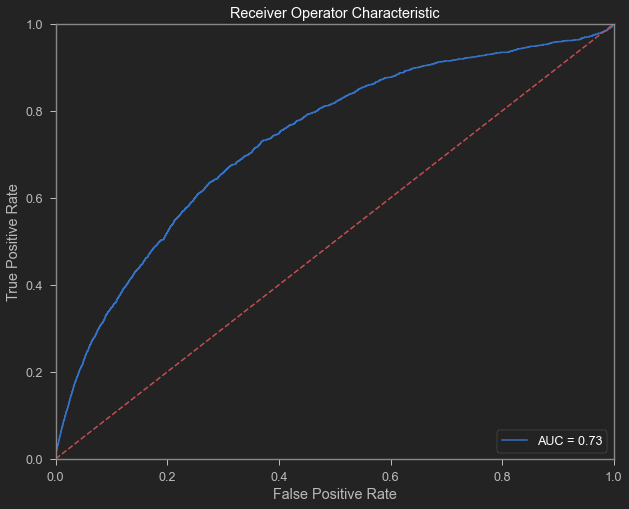

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     33135
           1       0.18      0.38      0.25      2433

    accuracy                           0.84     35568
   macro avg       0.57      0.63      0.58     35568
weighted avg       0.90      0.84      0.87     35568

[[28947  4188]
 [ 1498   935]]


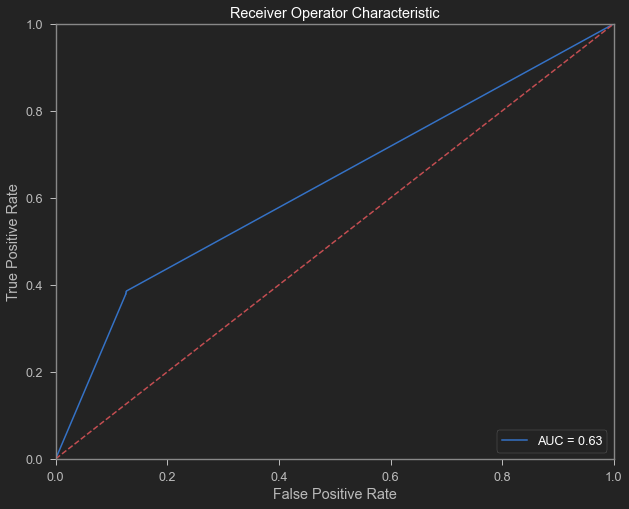

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     33135
           1       0.30      0.45      0.36      2433

    accuracy                           0.89     35568
   macro avg       0.63      0.69      0.65     35568
weighted avg       0.91      0.89      0.90     35568

[[30601  2534]
 [ 1341  1092]]


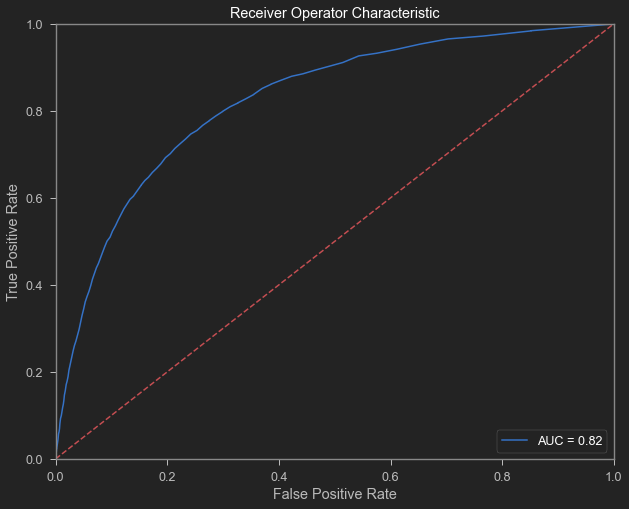

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     33135
           1       0.29      0.48      0.36      2433

    accuracy                           0.88     35568
   macro avg       0.62      0.70      0.65     35568
weighted avg       0.91      0.88      0.90     35568

[[30199  2936]
 [ 1256  1177]]


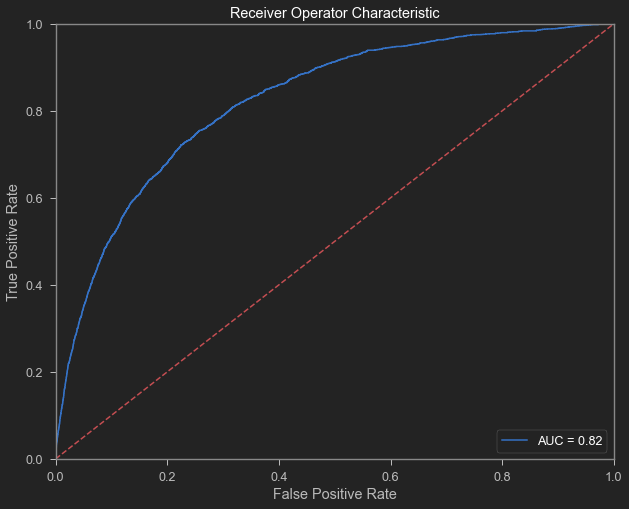

----------------------------------------------------------
logistic
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     27983
           1       0.17      0.61      0.27      2085

    accuracy                           0.77     30068
   macro avg       0.57      0.69      0.56     30068
weighted avg       0.91      0.77      0.82     30068

[[21724  6259]
 [  806  1279]]


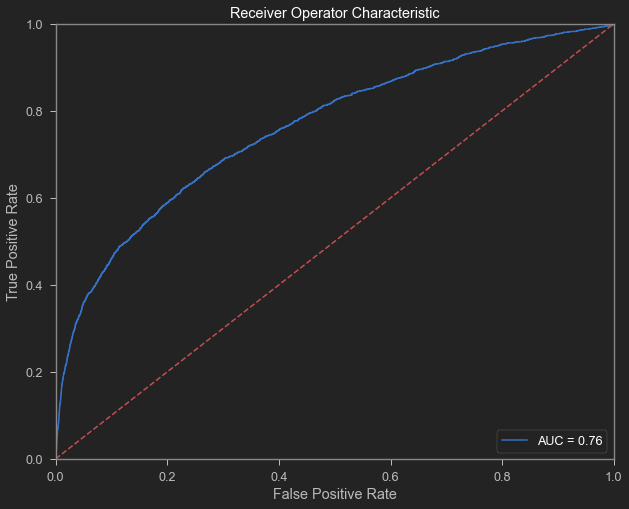

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     27983
           1       0.17      0.35      0.23      2085

    accuracy                           0.84     30068
   macro avg       0.56      0.61      0.57     30068
weighted avg       0.89      0.84      0.86     30068

[[24419  3564]
 [ 1347   738]]


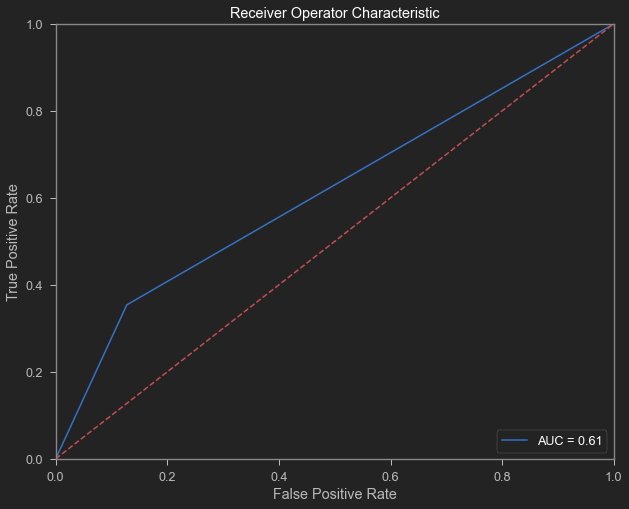

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     27983
           1       0.31      0.40      0.35      2085

    accuracy                           0.90     30068
   macro avg       0.63      0.67      0.65     30068
weighted avg       0.91      0.90      0.90     30068

[[26103  1880]
 [ 1242   843]]


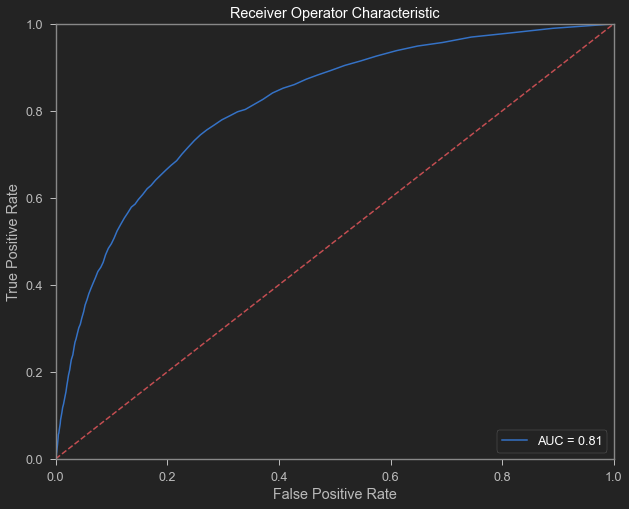

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     27983
           1       0.29      0.39      0.34      2085

    accuracy                           0.89     30068
   macro avg       0.62      0.66      0.64     30068
weighted avg       0.91      0.89      0.90     30068

[[25981  2002]
 [ 1262   823]]


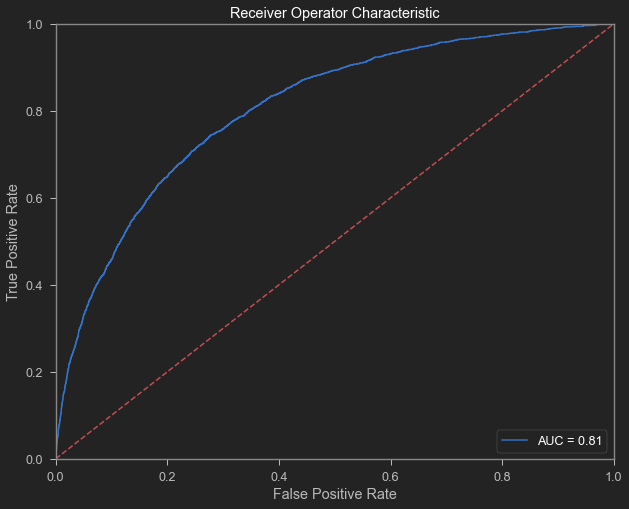

----------------------------------------------------------
logistic
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     33191
           1       0.17      0.71      0.27      2310

    accuracy                           0.75     35501
   macro avg       0.57      0.73      0.56     35501
weighted avg       0.92      0.75      0.81     35501

[[24951  8240]
 [  668  1642]]


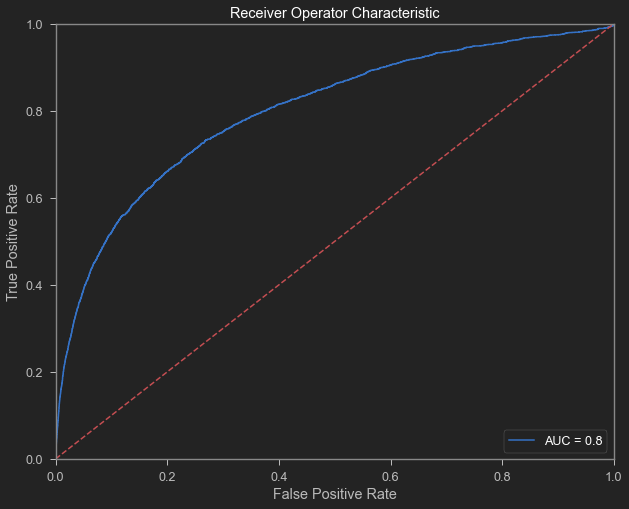

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     33191
           1       0.17      0.40      0.24      2310

    accuracy                           0.84     35501
   macro avg       0.56      0.63      0.58     35501
weighted avg       0.90      0.84      0.87     35501

[[28784  4407]
 [ 1384   926]]


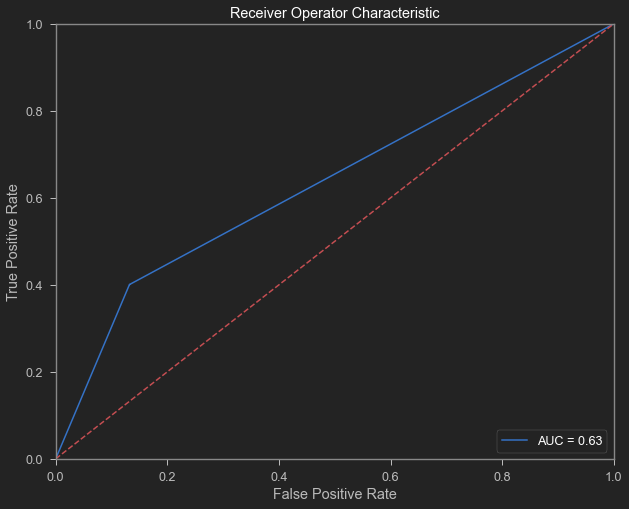

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     33191
           1       0.27      0.44      0.34      2310

    accuracy                           0.89     35501
   macro avg       0.62      0.68      0.64     35501
weighted avg       0.91      0.89      0.90     35501

[[30491  2700]
 [ 1289  1021]]


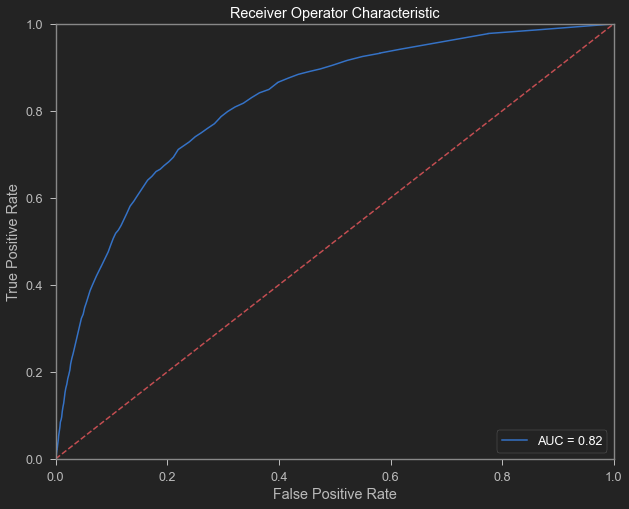

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     33191
           1       0.27      0.47      0.34      2310

    accuracy                           0.88     35501
   macro avg       0.62      0.69      0.64     35501
weighted avg       0.92      0.88      0.90     35501

[[30210  2981]
 [ 1214  1096]]


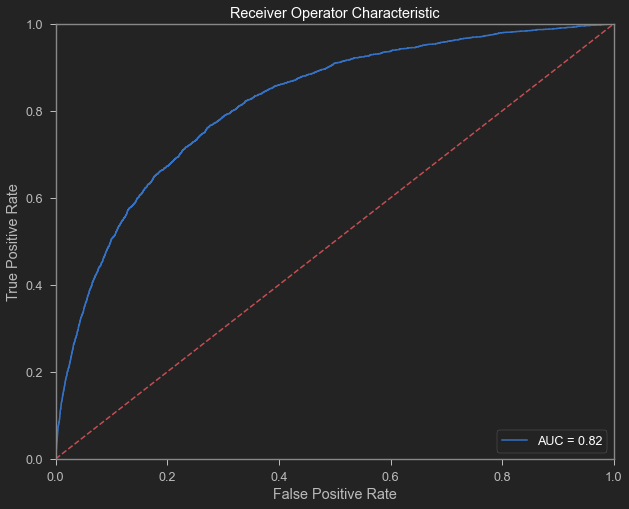

----------------------------------------------------------
logistic
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     24335
           1       0.20      0.73      0.31      1793

    accuracy                           0.77     26128
   macro avg       0.59      0.75      0.59     26128
weighted avg       0.92      0.77      0.83     26128

[[18938  5397]
 [  483  1310]]


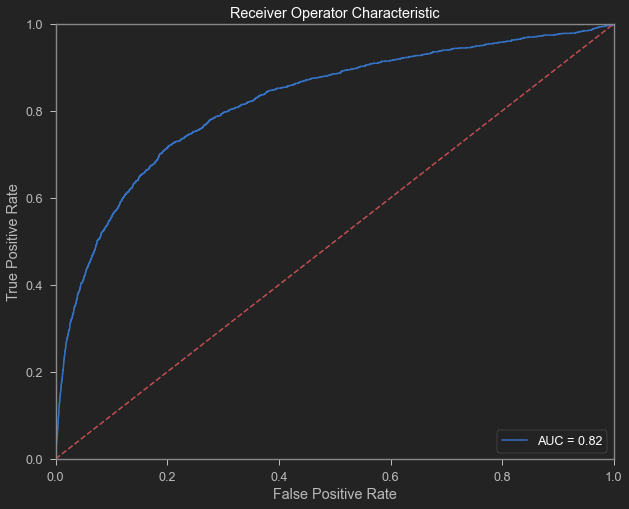

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     24335
           1       0.17      0.37      0.24      1793

    accuracy                           0.84     26128
   macro avg       0.56      0.62      0.57     26128
weighted avg       0.90      0.84      0.86     26128

[[21152  3183]
 [ 1124   669]]


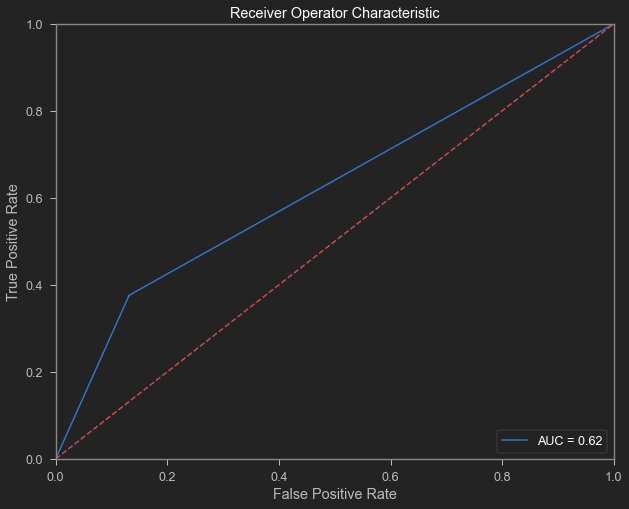

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     24335
           1       0.30      0.44      0.36      1793

    accuracy                           0.89     26128
   macro avg       0.63      0.68      0.65     26128
weighted avg       0.91      0.89      0.90     26128

[[22542  1793]
 [ 1013   780]]


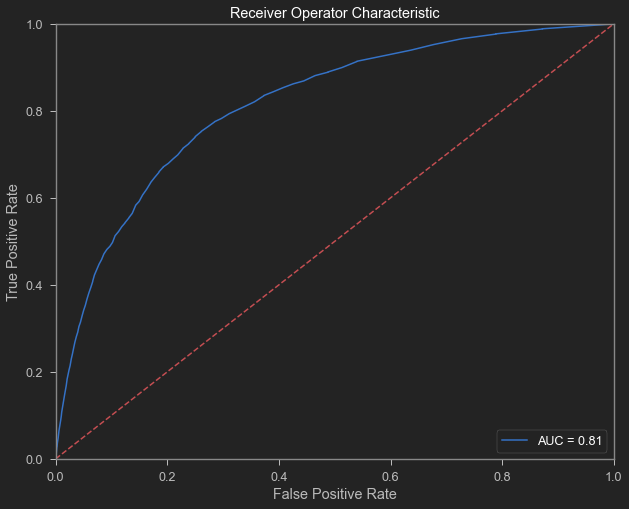

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     24335
           1       0.28      0.44      0.34      1793

    accuracy                           0.88     26128
   macro avg       0.62      0.68      0.64     26128
weighted avg       0.91      0.88      0.89     26128

[[22280  2055]
 [ 1006   787]]


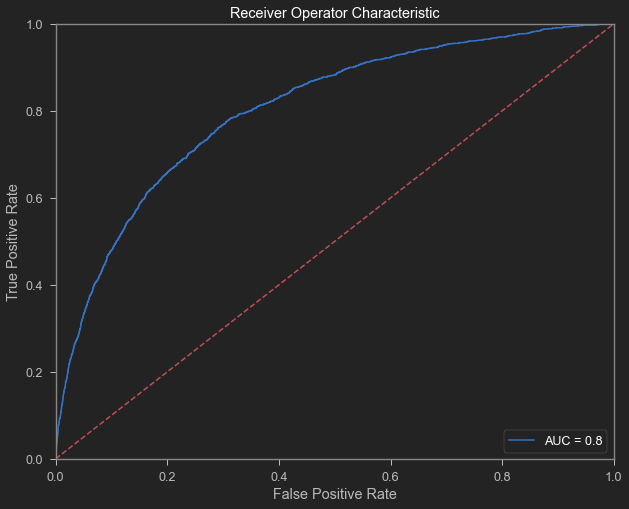

----------------------------------------------------------
logistic
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     23450
           1       0.14      0.66      0.23      1610

    accuracy                           0.72     25060
   macro avg       0.55      0.69      0.53     25060
weighted avg       0.92      0.72      0.79     25060

[[16962  6488]
 [  555  1055]]


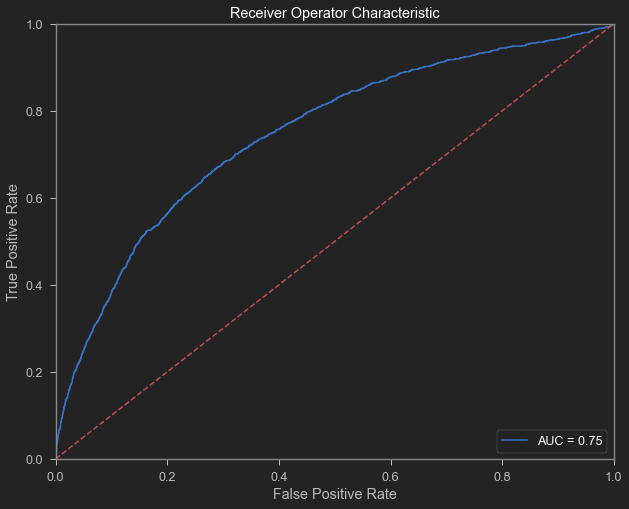

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     23450
           1       0.15      0.37      0.22      1610

    accuracy                           0.83     25060
   macro avg       0.55      0.62      0.56     25060
weighted avg       0.90      0.83      0.86     25060

[[20157  3293]
 [ 1012   598]]


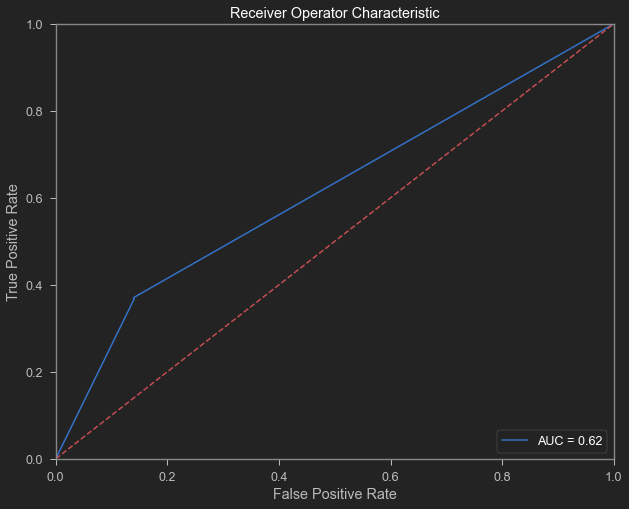

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     23450
           1       0.25      0.40      0.31      1610

    accuracy                           0.89     25060
   macro avg       0.61      0.66      0.62     25060
weighted avg       0.91      0.89      0.90     25060

[[21568  1882]
 [  966   644]]


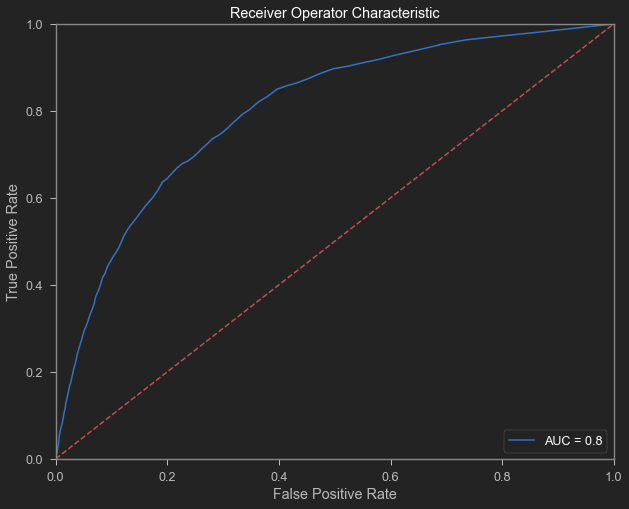

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     23450
           1       0.23      0.44      0.30      1610

    accuracy                           0.87     25060
   macro avg       0.60      0.67      0.62     25060
weighted avg       0.91      0.87      0.89     25060

[[21128  2322]
 [  907   703]]


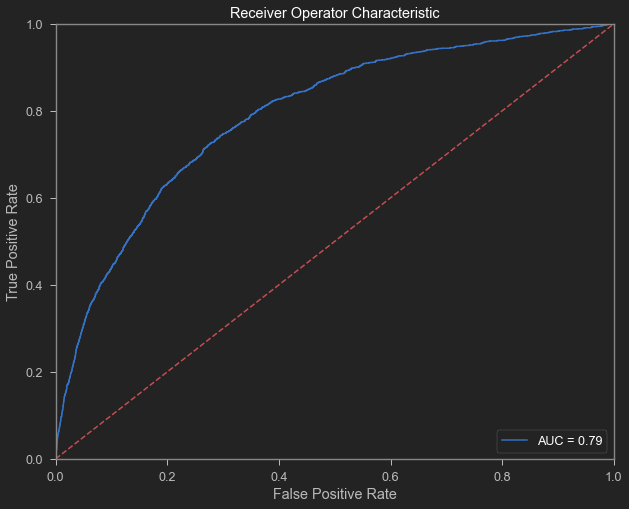

----------------------------------------------------------
logistic
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     33135
           1       0.14      0.66      0.24      2433

    accuracy                           0.71     35568
   macro avg       0.55      0.69      0.53     35568
weighted avg       0.91      0.71      0.78     35568

[[23517  9618]
 [  821  1612]]


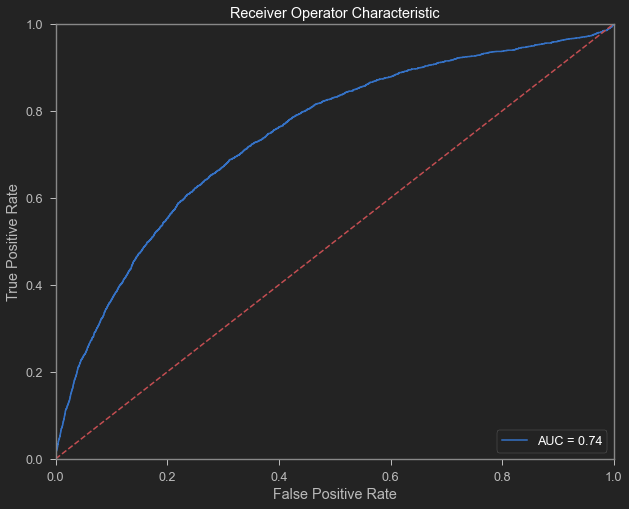

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.87      0.90     33135
           1       0.16      0.34      0.21      2433

    accuracy                           0.83     35568
   macro avg       0.55      0.60      0.56     35568
weighted avg       0.89      0.83      0.86     35568

[[28706  4429]
 [ 1607   826]]


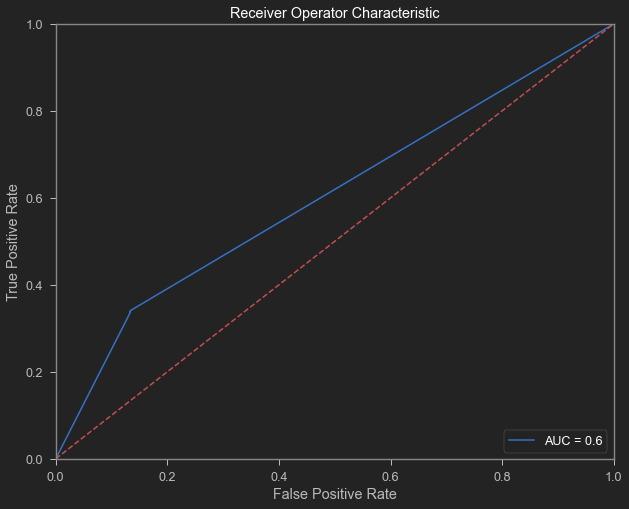

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     33135
           1       0.25      0.38      0.30      2433

    accuracy                           0.88     35568
   macro avg       0.60      0.65      0.62     35568
weighted avg       0.90      0.88      0.89     35568

[[30353  2782]
 [ 1500   933]]


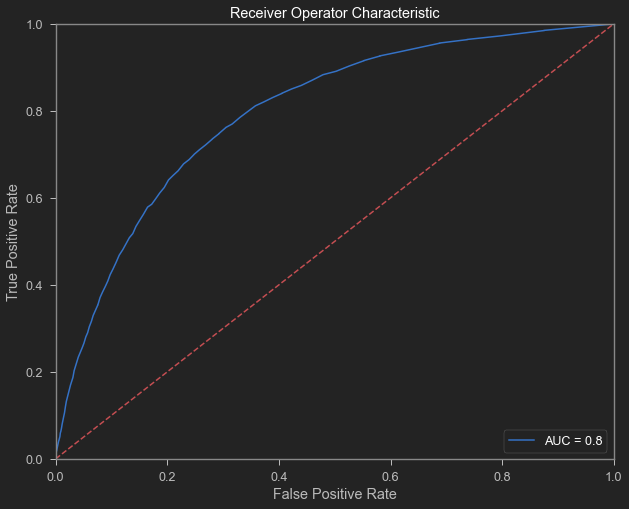

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     33135
           1       0.24      0.40      0.30      2433

    accuracy                           0.87     35568
   macro avg       0.59      0.65      0.61     35568
weighted avg       0.90      0.87      0.89     35568

[[29971  3164]
 [ 1458   975]]


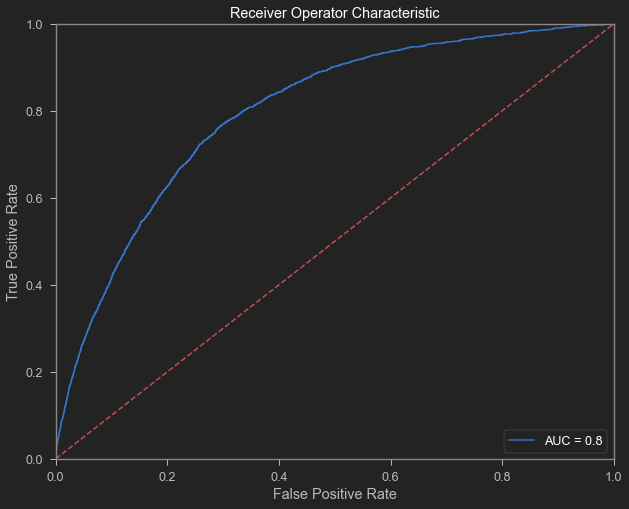

----------------------------------------------------------


In [89]:
gabungan=[['logistic',LogisticRegression()],['decision tree', DecisionTreeClassifier()],
          ['Random Forest',RandomForestClassifier()],['XGBoost',XGBClassifier()] ]
all_data=[['data1',data],['data2',data2],['data3',data3],['data4',data4],['data5',data5],['data6',data6]]

perform=[]
for satuan in all_data:
    X = satuan[1].drop('SeriousDlqin2yrs',axis=1)
    target = satuan[1]['SeriousDlqin2yrs']
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25,random_state=10)
    
    # SMOTE to make the unbalanced data become balanced
    from imblearn.over_sampling import SMOTE
    sm=SMOTE(sampling_strategy='minority')

    oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
    oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
    oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)
    
    #looping the model
    for i in gabungan:
        print(i[0])
        model=i[1]
        model.fit(oversampled_trainX,oversampled_trainY)
        predict=model.predict(X_test)
        predict_proba=model.predict_proba(X_test)
        print(classification_report(y_test,predict))
        print(confusion_matrix(y_test,predict))

        preds=predict_proba[:,1]
        fpr,tpr,threshold=roc_curve(y_test,preds)
        roc_auc=auc(fpr,tpr)

        plt.figure(figsize=(10,8))
        plt.title('Receiver Operator Characteristic')
        plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

        perform.append([i[0],satuan[0],roc_auc])
        print('----------------------------------------------------------')

In [90]:
eva = pd.DataFrame(perform, columns=['model','data','ROCAUC'])
eva.head(1)

,model,data,ROCAUC
0,logistic,data1,0.733266


In [91]:
eva.style.background_gradient()

,model,data,ROCAUC
0,logistic,data1,0.733266
1,decision tree,data1,0.629312
2,Random Forest,data1,0.823838
3,XGBoost,data1,0.823016
4,logistic,data2,0.762617
5,decision tree,data2,0.613297
6,Random Forest,data2,0.813169
7,XGBoost,data2,0.805387
8,logistic,data3,0.799359
9,decision tree,data3,0.634228


based on the table above, GB in data1 showing the best result. 

# Tuning GB

In [92]:
from sklearn.metrics import roc_auc_score,mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

In [93]:
X = data.drop('SeriousDlqin2yrs',axis=1)
target = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30)

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

In [94]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [96]:
dtrain = xgb.DMatrix(oversampled_trainX, label=oversampled_trainY)
dtest = xgb.DMatrix(X_test)

In [97]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 3000),
    'max_depth': (3,10),
    'subsample': (1.0, 10),  
    'colsample': (1.0, 10),  
    'gamma': (0, 5)}
 
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
 
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
 
    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, oversampled_trainX, oversampled_trainY, cv=3, scoring='roc_auc'))
 
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [98]:
optimizer.maximize(init_points=3, n_iter=10)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9455   |  4.753    |  3.602    |  0.01011  |  5.116    |  525.6    |  1.831    |
|  2        |  0.9655   |  2.676    |  1.728    |  0.4028   |  6.772    |  1.316e+0 |  7.167    |
|  3        |  0.9581   |  2.84     |  4.391    |  0.03711  |  7.693    |  1.31e+03 |  6.028    |
|  4        |  0.9709   |  3.854    |  0.9165   |  0.6245   |  9.414    |  1.324e+0 |  7.915    |
|  5        |  0.9513   |  1.427    |  3.191    |  0.2506   |  3.733    |  1.341e+0 |  4.803    |
|  6        |  0.9736   |  8.942    |  0.1728   |  0.5588   |  7.69     |  1.322e+0 |  2.349    |
|  7        |  0.9723   |  4.686    |  0.6115   |  0.7327   |  9.077    |  2.022e+0 |  4.555    |
|  8        |  0.9592   |  6.619    |  4.489    |  0.7771   |  6.334    |  2.037e+0 |  9.677    |
|  9        |  0.962

In [99]:
optimizer.max

{'target': 0.9735872941734117,
 'params': {'colsample': 8.942048527689634,
  'gamma': 0.17284932022957722,
  'learning_rate': 0.5587600892673332,
  'max_depth': 7.690413859581848,
  'n_estimators': 1321.6608925879577,
  'subsample': 2.3488831251775855}}

# Final Model

In [100]:
X = data.drop('SeriousDlqin2yrs',axis=1)
target = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25,random_state=10)

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

In [125]:
model_final=XGBClassifier(
        max_depth=8,
        learning_rate=0.037,
        n_estimators=1310,
        gamma=4.3,
        )
# model_final=XGBClassifier()

In [126]:
# colsample= 4.6856663411684,
# gamma= 0.6114861096983243,
# learning_rate= 0.7326817986415763,
# max_depth= 9.076602009830403,
# n_estimators= 2022.3756983886549,
# subsample= 4.554958202761771

In [127]:
model_final.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.037, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1310, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
predict=model_final.predict(X_test)
predict_proba=model_final.predict_proba(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     33135
           1       0.30      0.46      0.36      2433

    accuracy                           0.89     35568
   macro avg       0.63      0.69      0.65     35568
weighted avg       0.91      0.89      0.90     35568



In [129]:
matrix=pd.DataFrame(confusion_matrix(y_test,predict))
matrix

,0,1
0,30463,2672
1,1309,1124


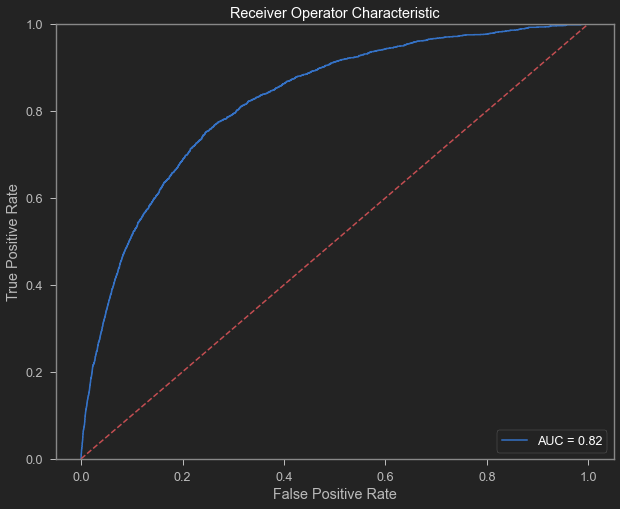

In [130]:
preds=predict_proba[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [131]:
roc_auc

0.823085050253695

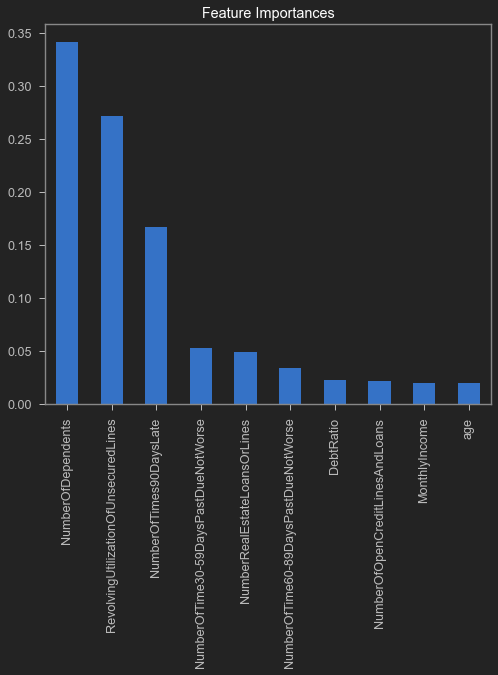

In [132]:
coef=pd.Series(model_final.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

# Deploy Model

In [133]:
X = data.drop('SeriousDlqin2yrs',axis=1)
target = data['SeriousDlqin2yrs']

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X,target)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

In [134]:
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265352 entries, 0 to 265351
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  265352 non-null  float64
 1   age                                   265352 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  265352 non-null  int64  
 3   DebtRatio                             265352 non-null  float64
 4   MonthlyIncome                         265352 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       265352 non-null  int64  
 6   NumberOfTimes90DaysLate               265352 non-null  int64  
 7   NumberRealEstateLoansOrLines          265352 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  265352 non-null  int64  
 9   NumberOfDependents                    265352 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 20.2 MB


In [135]:
model_final.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.037, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1310, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
import pickle
filename = 'default.sav';
pickle.dump(model_final, open(filename, 'wb'))